In [261]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [264]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap

"""
This code is taken from https://github.com/bgroenks96/generative-downscaling
"""

def plot_image(X):
    # X = num_to_nan(X, lo_thresh=50.0)
    # X_min, X_max = 240, 330
    img = plt.imshow(X.squeeze(), origin='lower', cmap='gist_ncar')
    # img.set_clim(vmin=X_min, vmax=X_max)
    plt.colorbar(fraction=0.025, pad=0.05)

def plot_image_map(X, lats, lons, cmap="viridis", figsize=(6,4), title='', min_max=None,  bins=100, gridlines=False):
    X = X.squeeze()
    assert len(X.shape) == 2
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=proj)
    ax.set_extent([lons[0], lons[-1], lats[0], lats[-1]], proj)
    min_val, max_val = (min_max[0], min_max[1]) if min_max is not None else (np.nanmin(X), np.nanmax(X))
    breaks = np.linspace(min_val-1.0E-15, max_val+1.0E-15, bins+1)
    cs = ax.contourf(lons, lats, X, breaks, cmap=cmap, transform=proj, extend='both')
    cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.04)
    ax.coastlines()
    if gridlines:
        ax.gridlines(crs=proj, draw_labels=True)
        ax.set_title(title, y=1.09)
    else:
        ax.set_title(title)
    
def image_map_factory(rows, cols, figsize=(6,4), cmap='viridis', min_max=None, bins=100, gridlines=False,
                      wspace=0.05, hspace=0.05, cbar_per_subplot=False, cbar_orientation='horizontal'):
    proj = ccrs.PlateCarree()
    fig, axarr = plt.subplots(rows, cols, figsize=(cols*figsize[0], rows*figsize[1]), subplot_kw={'projection': proj})
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    def plot_next(ax, X, lats, lons, cmap=cmap, title='', bins=bins, min_max=min_max, gridlines=gridlines):
        X = X.squeeze()
        assert len(X.shape) == 2
        ax.set_extent([lons[0], lons[-1], lats[0], lats[-1]], proj)
        min_val, max_val = (min_max[0]-1.0E-15, min_max[1]+1.0E-15) if min_max is not None else (np.nanmin(X), np.nanmax(X))
        breaks = np.linspace(min_val-1.0E-15, max_val+1.0E-15, bins+1)
        cs = ax.contourf(lons, lats, X, breaks, cmap=cmap, transform=proj, extend='both')
        if cbar_per_subplot:
            plt.colorbar(cs, ax=ax, orientation=cbar_orientation, pad=0.03)
        ax.coastlines()
        if gridlines:
            ax.gridlines(crs=proj, draw_labels=True)
            ax.set_title(title, y=1.09)
        else:
            ax.set_title(title)
        return cs
    return fig, axarr, plot_next

def prcp_cmap():
    colors = [(255.,255.,255.),
              (214.,226.,255.),
              (181.,201.,255.),
              (142.,178.,255.),
              (127.,150.,255.),
              (99.,112.,247.),
              (0.,99.,255.),
              (0.,150.,150.),
              (0.,198.,51.),
              (99.,255.,0.),
              (150.,255.,0.),
              (198.,255.,51.),
              (255.,255.,0.),
              (255.,198.,0.),
              (255.,160.,0.),
              (255.,124.,0.),
              (255.,25.,0.)]
    colors = np.array(colors) / 255.
    return ListedColormap(colors)

In [265]:
#MODELS = ['AE', 'EAD', 'naive', 'ours']
REGION_COORDS = {'nwus':([38,48],[238,248]), 'seus':([28,38], [268,278]), 
                'neus':([35,45], [273,283]), 'swus':([32,42], [242,252])}

In [266]:
region='nwus'
steps = 40

In [267]:
lat_range, lon_range = REGION_COORDS[region]
lats = np.linspace(lat_range[0], lat_range[1], steps)
lons = np.linspace(lon_range[0], lon_range[1], steps)

In [268]:
fig, axarr, plot_next = image_map_factory(3,2, hspace=0.15, wspace=0.15, cbar_per_subplot=True, 
            gridlines=False, cbar_orientation='vertical')

#### Please replace with your directory. The data is on the drive mentioned on the github

In [269]:
X = np.load("./BCSD_GARD_DATA/GARD/GARD-neus.npy")
Y = np.load("./BCSD_GARD_DATA/GARD/Y_true-GARD-neus.npy")

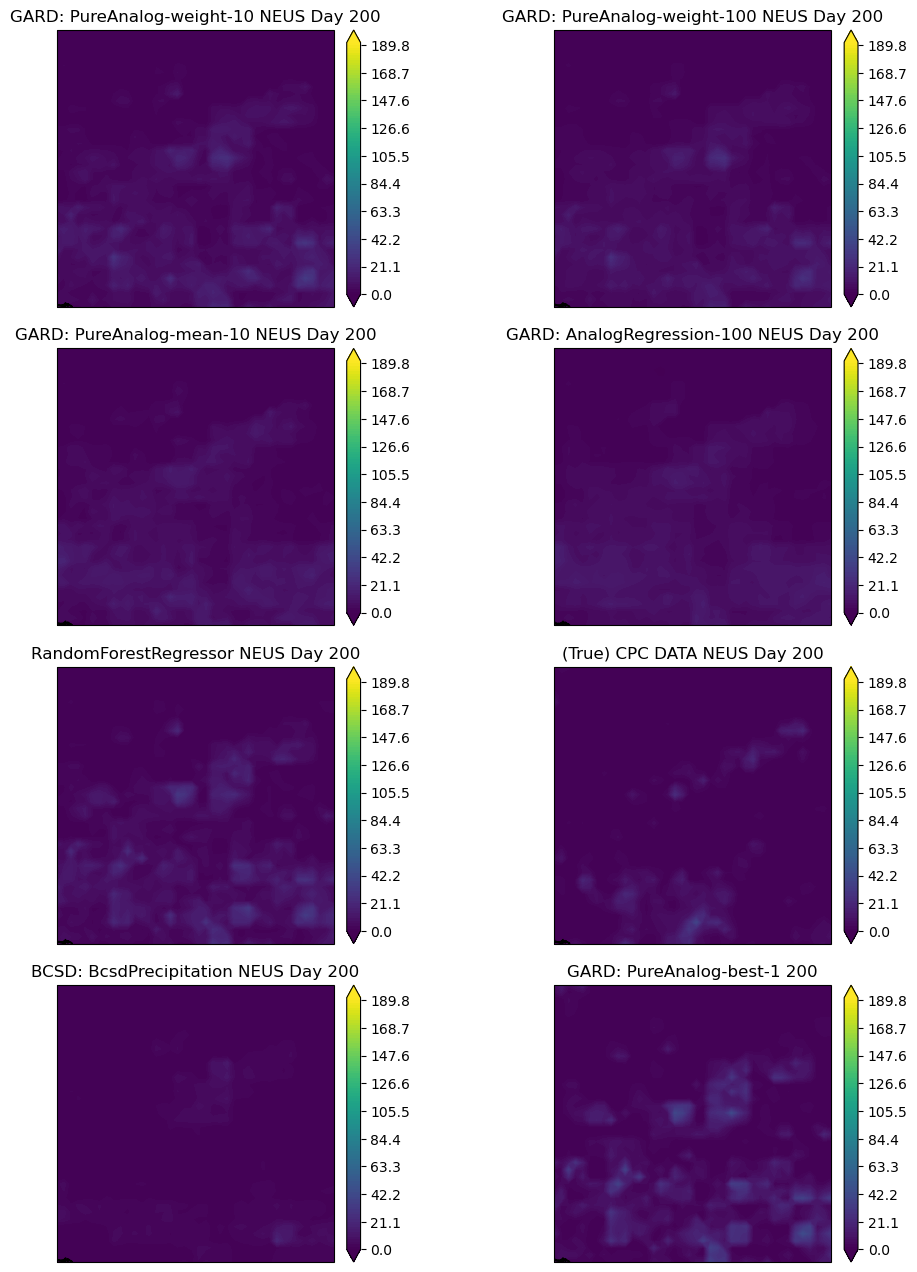

In [280]:
X = np.load("./BCSD_GARD_DATA/GARD/GARD-neus.npy")
Y = np.load("./BCSD_GARD_DATA/GARD/Y_true-GARD-neus.npy")
X_B = np.load("./BCSD_GARD_DATA/BCSD/BCSD_neus.npy")


date = 200
m = np.max(Y) 

fig, axarr, plot_next = image_map_factory(4,2, hspace=0.15, wspace=0.15, cbar_per_subplot=True, 
                                                    gridlines=False, cbar_orientation='vertical')

plot_next(axarr[0,0], X[2][date], lats, lons, 
            min_max=[0, m], title= f'GARD: PureAnalog-weight-10 NEUS Day {date}')

plot_next(axarr[0,1], X[3][date], lats, lons, 
            min_max=[0,m], title=f'GARD: PureAnalog-weight-100 NEUS Day {date}')

plot_next(axarr[1,0], X[4][date], lats, lons, 
            min_max=[0,m], title=f'GARD: PureAnalog-mean-10 NEUS Day {date}')


plot_next(axarr[1,1], X[5][date], lats, lons, 
            min_max=[0,m], title=f'GARD: AnalogRegression-100 NEUS Day {date}')

plot_next(axarr[2,0], X[7][date], lats, lons, 
            min_max=[0,m], title= f'RandomForestRegressor NEUS Day {date}')

plot_next(axarr[2,1], Y[date], lats, lons, 
            min_max=[0,m], title=f'(True) CPC DATA NEUS Day {date}')

plot_next(axarr[3,0], X_B[date], lats, lons, 
            min_max=[0,m], title= f'BCSD: BcsdPrecipitation NEUS Day {date}')

plot_next(axarr[3,1], X[0][date], lats, lons, 
            min_max=[0,m], title=f'GARD: PureAnalog-best-1 {date}')



plt.show()

In [271]:
models = [
    'GARD: PureAnalog-best-1',
    'GARD: PureAnalog-sample-10',
    'GARD: PureAnalog-weight-10',
    'GARD: PureAnalog-weight-100', 
    'GARD: PureAnalog-mean-10',
    'GARD: AnalogRegression-100',
    'GARD: LinearRegression',
    'Sklearn: RandomForestRegressor'
]

In [272]:
from sklearn.metrics import mean_squared_error
def RMSE(pred,target):
    return np.sqrt(np.mean((pred-target)**2))

def PCorrelation(pred,target):
    m_p=np.mean(pred)
    m_t=np.mean(target)
    return np.sum((pred-m_p)*(target-m_t))/(np.sqrt(np.sum((pred-m_p)**2))*np.sqrt(np.sum((target-m_t)**2))+0.00001)


def calc(X, X_B, Y):
    R = []; C = []
    for i in range(len(models)):
        c = PCorrelation(X[i], Y)
        r = RMSE(X[i], Y)
        print(f"Model {models[i]} :Correlation: {c} RMSE:{r}")
        R.append(r)
        C.append(c)
        
    c_b = PCorrelation(X_B, Y)
    r_b = RMSE(X_B, Y)
    R.append(r_b)
    C.append(c_b)
    print(f"BCSD: Correlation: {c_b} RMSE:{r}")
    
   
    return [C, R]

In [273]:
RR = []
CC = []

In [274]:
#NEUS
X = np.load("./BCSD_GARD_DATA/GARD/GARD-neus.npy")
Y = np.load("./BCSD_GARD_DATA/GARD/Y_true-GARD-neus.npy")
X_B = np.load("./BCSD_GARD_DATA/BCSD/BCSD_neus.npy")

x = calc(X, X_B, Y)

CC.append(x[0])
RR.append(x[1])

Model GARD: PureAnalog-best-1 :Correlation: 0.5116611663718015 RMSE:5.608801798165016
Model GARD: PureAnalog-sample-10 :Correlation: 0.4892327331271205 RMSE:5.68129631593329
Model GARD: PureAnalog-weight-10 :Correlation: 0.6308679294244876 RMSE:4.464320860501027
Model GARD: PureAnalog-weight-100 :Correlation: 0.6231774248904772 RMSE:4.399648094152708
Model GARD: PureAnalog-mean-10 :Correlation: 0.6768872913825419 RMSE:4.142371641726618
Model GARD: AnalogRegression-100 :Correlation: 0.7104629428029177 RMSE:3.964691704652741
Model GARD: LinearRegression :Correlation: 0.7131360711593077 RMSE:3.9416350254312524
Model Sklearn: RandomForestRegressor :Correlation: 0.5940832500747714 RMSE:4.791940375766303
BCSD: Correlation: 0.5591886254592846 RMSE:4.791940375766303


In [275]:
# NWUS
X = np.load("./BCSD_GARD_DATA/GARD/GARD-nwus.npy")
Y = np.load("./BCSD_GARD_DATA/GARD/Y_true-GARD-nwus.npy")
X_B = np.load("./BCSD_GARD_DATA/BCSD/BCSD_nwus.npy")


x = calc(X, X_B, Y)

CC.append(x[0])
RR.append(x[1])

Model GARD: PureAnalog-best-1 :Correlation: 0.5637048733182186 RMSE:3.000046933423167
Model GARD: PureAnalog-sample-10 :Correlation: 0.5410762669002115 RMSE:2.9622554033238897
Model GARD: PureAnalog-weight-10 :Correlation: 0.6677639529824838 RMSE:2.37503848992529
Model GARD: PureAnalog-weight-100 :Correlation: 0.6617178247530077 RMSE:2.334846631683854
Model GARD: PureAnalog-mean-10 :Correlation: 0.7063054255432165 RMSE:2.2077532390283388
Model GARD: AnalogRegression-100 :Correlation: 0.7274577897237385 RMSE:2.162885964748636
Model GARD: LinearRegression :Correlation: 0.7244292389433884 RMSE:2.1710692441012074
Model Sklearn: RandomForestRegressor :Correlation: 0.6389561167374866 RMSE:2.5396932162704897
BCSD: Correlation: 0.28746793347624583 RMSE:2.5396932162704897


In [276]:
#SEUS
X = np.load("./BCSD_GARD_DATA/GARD/GARD-seus.npy")
Y = np.load("./BCSD_GARD_DATA/GARD/Y_true-GARD-seus.npy")
X_B = np.load("./BCSD_GARD_DATA/BCSD/BCSD_seus.npy")


x = calc(X, X_B, Y)

CC.append(x[0])
RR.append(x[1])

Model GARD: PureAnalog-best-1 :Correlation: 0.4694794959926865 RMSE:8.259288435520563
Model GARD: PureAnalog-sample-10 :Correlation: 0.44030020484605814 RMSE:8.356060223227253
Model GARD: PureAnalog-weight-10 :Correlation: 0.5900306068511363 RMSE:6.8312391354213275
Model GARD: PureAnalog-weight-100 :Correlation: 0.5610233256757906 RMSE:7.004911939078935
Model GARD: PureAnalog-mean-10 :Correlation: 0.63751831518519 RMSE:6.488159334617108
Model GARD: AnalogRegression-100 :Correlation: 0.6737384585647533 RMSE:6.213166142375776
Model GARD: LinearRegression :Correlation: 0.6754616262332201 RMSE:6.205010947169486
Model Sklearn: RandomForestRegressor :Correlation: 0.5543287737439742 RMSE:7.194197611004395
BCSD: Correlation: 0.4816024339879091 RMSE:7.194197611004395


In [277]:
#SWUS
X = np.load("./BCSD_GARD_DATA/GARD/GARD-swus.npy")
Y = np.load("./BCSD_GARD_DATA/GARD/Y_true-GARD-swus.npy")
X_B = np.load("./BCSD_GARD_DATA/BCSD/BCSD_swus.npy")


x = calc(X, X_B, Y)

CC.append(x[0])
RR.append(x[1])

Model GARD: PureAnalog-best-1 :Correlation: 0.5637048733182186 RMSE:3.000046933423167
Model GARD: PureAnalog-sample-10 :Correlation: 0.5410275881335377 RMSE:2.967884117770471
Model GARD: PureAnalog-weight-10 :Correlation: 0.6677639529824838 RMSE:2.37503848992529
Model GARD: PureAnalog-weight-100 :Correlation: 0.6617178247530077 RMSE:2.334846631683854
Model GARD: PureAnalog-mean-10 :Correlation: 0.7063054255432165 RMSE:2.2077532390283388
Model GARD: AnalogRegression-100 :Correlation: 0.7274577897237385 RMSE:2.162885964748636
Model GARD: LinearRegression :Correlation: 0.7244292389433884 RMSE:2.1710692441012074
Model Sklearn: RandomForestRegressor :Correlation: 0.6389561167374866 RMSE:2.5396932162704897
BCSD: Correlation: 0.016523853504654105 RMSE:2.5396932162704897


In [278]:
len(RR[0])

9

In [279]:
for i in range(len(RR[0])):
    c = 0; r = 0
    for j in range(4):
        r += RR[j][i]
        c += CC[j][i]
    r = r/ 4
    c = c/ 4 
    if i < 8:
        print(f"Model: {models[i]} RMSE: {r} Correlation: {c}") 
    else:
        print(f"Model: BCSD RMSE: {r} Correlation: {c}") 

Model: GARD: PureAnalog-best-1 RMSE: 4.967046025132978 Correlation: 0.5271376022502312
Model: GARD: PureAnalog-sample-10 RMSE: 4.9918740150637255 Correlation: 0.502909198251732
Model: GARD: PureAnalog-weight-10 RMSE: 4.011409243943234 Correlation: 0.6391066105601478
Model: GARD: PureAnalog-weight-100 RMSE: 4.018563324149838 Correlation: 0.6269091000180708
Model: GARD: PureAnalog-mean-10 RMSE: 3.761509363600101 Correlation: 0.6817541144135413
Model: GARD: AnalogRegression-100 RMSE: 3.625907444131447 Correlation: 0.7097792452037871
Model: GARD: LinearRegression RMSE: 3.622196115200788 Correlation: 0.7093640438198262
Model: Sklearn: RandomForestRegressor RMSE: 4.26638110482792 Correlation: 0.6065810643234297
Model: BCSD RMSE: 4.997611599909816 Correlation: 0.3361957116070234
